In [1]:
import pandas as pd
pd.__version__

'1.1.5'

In [2]:
import copy
import os
import numpy as np
from matplotlib import pyplot
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
columa_y = int(input("¿En que columna del (0 a N) esta Y? ")) # y = 9
dataset = np.loadtxt("/content/gdrive/MyDrive/CASAS_DATASET/data_set_casas_sucre.csv", delimiter=',')

print(dataset,dataset.shape)
print()
X = copy.deepcopy(np.delete(dataset, columa_y, axis=1)) 
Y = copy.deepcopy(dataset[:,columa_y])
print(X,X.shape)
print()
print(Y,Y.shape)

#m = Y.shape[0]

¿En que columna del (0 a N) esta Y? 9
[[-1.9051467e+01 -6.5262748e+01  5.0000000e+00  3.0000000e+00
   1.6500000e+03  9.0000000e+02  1.7000000e+01  3.0000000e+00
   1.0000000e+01  9.8500000e+05]
 [-1.9049678e+01 -6.5258720e+01  5.0000000e+00  3.0000000e+00
   8.6000000e+02  6.0400000e+02  1.1000000e+01  3.0000000e+00
   8.0000000e+00  9.0000000e+05]
 [-1.9019375e+01 -6.5261999e+01  4.0000000e+00  3.0000000e+00
   2.5000000e+02  1.5000000e+02  4.0000000e+00  1.0000000e+00
   3.0000000e+00  5.9000000e+04]
 [-1.9051948e+01 -6.5258505e+01  3.0000000e+00  3.0000000e+00
   1.9100000e+02  2.0900000e+02  1.7000000e+01  1.0000000e+00
   1.0000000e+01  2.0000000e+05]
 [-1.9033583e+01 -6.5242272e+01  4.0000000e+00  3.0000000e+00
   3.0000000e+02  2.0000000e+02  6.0000000e+00  1.0000000e+00
   9.0000000e+00  1.8000000e+05]
 [-1.9154431e+01 -6.5249478e+01  5.0000000e+00  3.0000000e+00
   2.0000000e+03  3.2000000e+03  9.0000000e+00  1.0000000e+00
   8.0000000e+00  3.0000000e+05]
 [-1.9039164e+01 -6.

In [5]:
# IMPORTAR KERAS
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
print(tf.__version__)

2.5.0


In [6]:
# modelo # 2 capas ocultas         #numero de x
def build_model():
  model = keras.Sequential([
    layers.Dense(200, activation='relu', input_shape=[9]),
    layers.Dense(200, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0023)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [7]:
model = build_model()

In [8]:
model.fit(X,Y,epochs=10,verbose=0) #verel progreso

In [9]:
!pip install git+https://github.com/tensorflow/docs

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-4x4s2515
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-4x4s2515
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.047a807024a49d648ff635434d49e3f03a8cfc57a_-cp37-none-any.whl size=154244 sha256=4e78e1d99f6f69d9dece9c53ca3fedbd19922d4e75db58cdaf6a362146ccfad7
  Stored in directory: /tmp/pip-ephem-wheel-cache-t9zj3rq3/wheels/eb/1b/35/fce87697be00d2fc63e0b4b395b0d9c7e391a10e98d9a0d97f
Successfully built tensorflow-docs


In [10]:
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling

In [11]:
EPOCHS = 2200

history = model.fit(
  X, Y,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:167582433280.0000,  mae:311182.6562,  mse:167582433280.0000,  val_loss:77569343488.0000,  val_mae:260962.2500,  val_mse:77569343488.0000,  
....................................................................................................
Epoch: 100, loss:65309757440.0000,  mae:162576.3438,  mse:65309757440.0000,  val_loss:210273452032.0000,  val_mae:230781.8125,  val_mse:210273452032.0000,  
....................................................................................................
Epoch: 200, loss:36156739584.0000,  mae:143366.5156,  mse:36156739584.0000,  val_loss:19183446016.0000,  val_mae:125638.2109,  val_mse:19183446016.0000,  
....................................................................................................
Epoch: 300, loss:33581094912.0000,  mae:139166.7344,  mse:33581094912.0000,  val_loss:23357554688.0000,  val_mae:132245.8281,  val_mse:23357554688.0000,  
..........................................................................

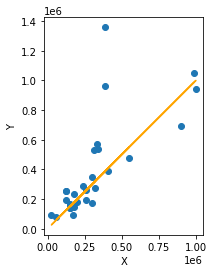

In [12]:
import matplotlib.pyplot as plt
test_predictions = model.predict(X).flatten()
a = plt.axes(aspect='equal')
plt.scatter(Y,test_predictions)
plt.xlabel('X')
plt.ylabel('Y')
_=plt.plot(Y,Y,color='orange')

In [13]:
# predicion de valor diferente alo datos de entrenamiento


model.predict(np.array([[-19.051465,-65.262740,5,3,1000,700,10,3,9]]))  # valor real de Y = 800000 = -19.051465,-65.262740,5,3,1000,700,10,3,9


array([[810911.25]], dtype=float32)